# Question 1

In [1]:
import matplotlib.pyplot as plt

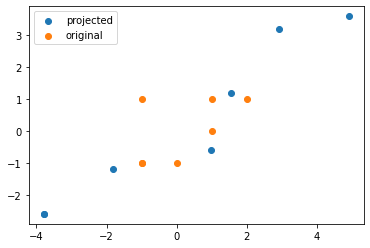

In [31]:
xi=[0,1,2,1,-1,-1,-1]
yi=[-1,0,1,1,1,-1,-1]
xo=[-1.82,1.54,4.9,2.93,0.98,-3.78,-3.78]
yo=[-1.2,1.2,3.6,3.2,-0.6,-2.6,-2.6]
plt.scatter(xo, yo,label='projected')
plt.scatter(xi, yi,label='original')
plt.legend()

# Question 2

## part 1 - Visualisation

In [33]:
import numpy as np
with open('train_set.npy','rb') as f:
    x_train = np.load(f)
    y_train = np.load(f)
with open('test_set.npy','rb') as f:
    x_test = np.load(f)
    y_test = np.load(f)
print(f'x_train.shape = {x_train.shape} --y_train.shape = {y_train.shape}')
print(f'x_test.shape = {x_test.shape} --y_test.shape = {y_test.shape}')

x_train.shape = (128, 2) --y_train.shape = (128,)
x_test.shape = (32, 2) --y_test.shape = (32,)


In [34]:
y_train = np.where(y_train == 0, -1, 1)
y_test = np.where(y_test == 0, -1, 1)

In [35]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

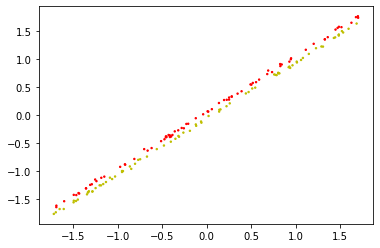

In [36]:
c1 = np.where(y_train == -1, 'r', 'y')
c2 = np.where(y_test == -1, 'r', 'y')
plt.scatter(x_train.T[0], x_train.T[1],s=2,c=c1)
plt.scatter(x_test.T[0], x_test.T[1],s=2,c=c2)

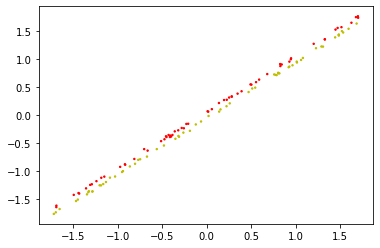

In [37]:
plt.scatter(x_train.T[0], x_train.T[1],s=2,c=c1)

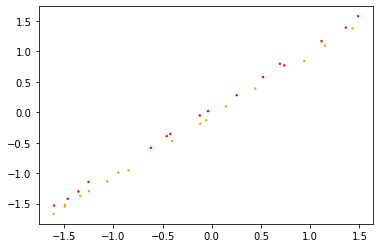

In [38]:
plt.scatter(x_test.T[0], x_test.T[1],s=2,c=c2)

## part 2 - LDA

In [39]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda_train = lda.fit_transform(x_train, y_train)
lda.coef_

array([[ 386.49722, -386.96594]], dtype=float32)

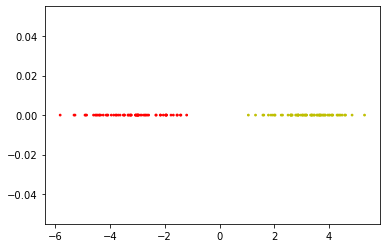

In [40]:
plt.scatter(lda_train, [0]*len(lda_train),s=3,c=c1)

In [41]:
from sklearn.linear_model import Perceptron
perc1 = Perceptron()
perc1.fit(lda_train, y_train)
print(perc1.coef_)
print(perc1.intercept_)

[[2.49924668]]
[1.]


In [42]:
from sklearn import metrics

y_train_predict = perc1.predict(lda_train)
lda_test = lda.transform(x_test)
y_test_predict = perc1.predict(lda_test)

print(metrics.classification_report(y_train, y_train_predict))
print(metrics.classification_report(y_test, y_test_predict))

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00        64
           1       1.00      1.00      1.00        64

    accuracy                           1.00       128
   macro avg       1.00      1.00      1.00       128
weighted avg       1.00      1.00      1.00       128

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        16

    accuracy                           1.00        32
   macro avg       1.00      1.00      1.00        32
weighted avg       1.00      1.00      1.00        32



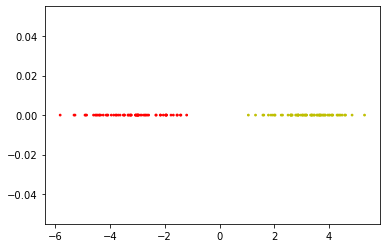

In [12]:
c3 = np.where(y_train != y_train_predict, 'black', c1)
plt.scatter(lda_train, [0]*len(lda_train),s=3,c=c3)

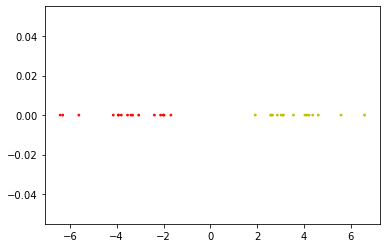

In [13]:
c4 = np.where(y_test != y_test_predict, 'black', c2)
plt.scatter(lda_test, [0]*len(lda_test),s=3,c=c4)

## part 3 - PCA

In [14]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1)
pca_train = pca.fit_transform(x_train, y_train)
pca.get_covariance()

array([[1.0078739, 1.0062541],
       [1.0062541, 1.0078735]], dtype=float32)

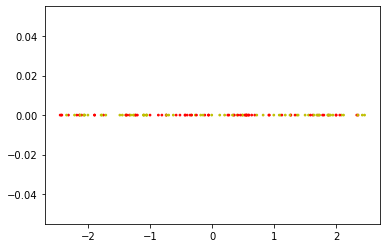

In [15]:
plt.scatter(pca_train, [0]*len(pca_train),s=3,c=c1)

In [16]:
perc2 = Perceptron()
perc2.fit(pca_train, y_train)
print(perc2.coef_)
print(perc2.intercept_)

[[-0.5916291]]
[0.]


In [17]:
y_train_predict = perc2.predict(pca_train)
pca_test = pca.transform(x_test)
y_test_predict = perc2.predict(pca_test)

print(metrics.classification_report(y_train, y_train_predict))
print(metrics.classification_report(y_test, y_test_predict))

              precision    recall  f1-score   support

          -1       0.50      0.50      0.50        64
           1       0.50      0.50      0.50        64

    accuracy                           0.50       128
   macro avg       0.50      0.50      0.50       128
weighted avg       0.50      0.50      0.50       128

              precision    recall  f1-score   support

          -1       0.45      0.56      0.50        16
           1       0.42      0.31      0.36        16

    accuracy                           0.44        32
   macro avg       0.43      0.44      0.43        32
weighted avg       0.43      0.44      0.43        32



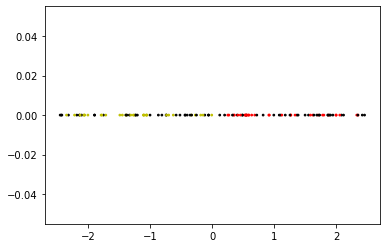

In [18]:
c3 = np.where(y_train != y_train_predict, 'black', c1)
plt.scatter(pca_train, [0]*len(pca_train),s=3,c=c3)

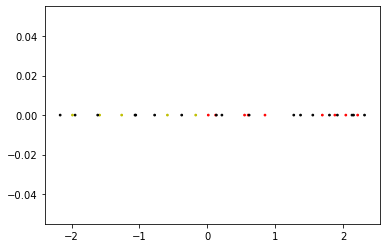

In [19]:
c4 = np.where(y_test != y_test_predict, 'black', c2)
plt.scatter(pca_test, [0]*len(pca_test),s=3,c=c4)

# Question 3

## part 1

In [43]:
import scipy.io
mat = scipy.io.loadmat('faces.mat')
mat

{'__header__': b'MATLAB 5.0 MAT-file, Platform: MAC2, Created on: Mon Mar 18 09:06:53 2002',
 '__version__': '1.0',
 '__globals__': [],
 'faces': array([[ 75, 110,  77, ..., 121,  52, 125],
        [ 83, 108,  75, ..., 119,  49, 125],
        [ 83, 120,  65, ..., 113,  51, 125],
        ...,
        [ 42,  35,  37, ...,  41, 143,  96],
        [ 40,  33,  38, ...,  45, 144,  91],
        [ 38,  37,  37, ...,  46, 146,  93]], dtype=uint8),
 'p': array([[0.025, 0.025, 0.025, 0.025, 0.025, 0.025, 0.025, 0.025, 0.025,
         0.025, 0.025, 0.025, 0.025, 0.025, 0.025, 0.025, 0.025, 0.025,
         0.025, 0.025, 0.025, 0.025, 0.025, 0.025, 0.025, 0.025, 0.025,
         0.025, 0.025, 0.025, 0.025, 0.025, 0.025, 0.025, 0.025, 0.025,
         0.025, 0.025, 0.025, 0.025]]),
 'u': array([[ 82.6, 151. ,  91.7, ...,  34.4,  64.2, 100.2],
        [ 82.5, 156.3,  88.8, ...,  36.4,  65.2, 100. ],
        [ 84.3, 160.3,  87.6, ...,  38.2,  69. ,  98.6],
        ...,
        [ 68.2,  29.9,  73.7, ..., 

In [44]:
def imagepreview(im):
    im.resize(64,64) 
    plt.imshow(im,cmap='gray')
    plt.show()

In [67]:
import matplotlib.pyplot as plt
import numpy as np
pictures = np.array([np.array([i[j] for i in mat['faces']]) for j in range(0,400)])
people = np.array([ i//10 for i in range(0,400)])

In [68]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(pictures, people, test_size=0.3,shuffle=False)

In [24]:
from sklearn.decomposition import PCA

pca = PCA(n_components=45)
pca.fit(x_train)
pca_train_x = pca.transform(x_train)
pca_test_x = pca.transform(x_test)

In [47]:
from sklearn.metrics import mean_squared_error

x_train_projected = pca.inverse_transform(pca_train_x)
x_test_projected = pca.inverse_transform(pca_test_x)
rmse_train = mean_squared_error(x_train_projected, x_train, squared=False)
rmse_test = mean_squared_error(x_test_projected, x_test, squared=False)
print(f'RMSE on train data = {rmse_train}')
print(f'RMSE on test data = {rmse_test}')

RMSE on train data = 5.009819229301267
RMSE on test data = 14.79980019146411


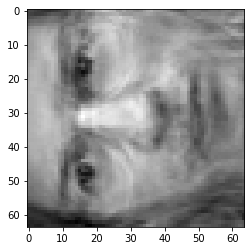

In [52]:
imagepreview(x_test_projected[1])

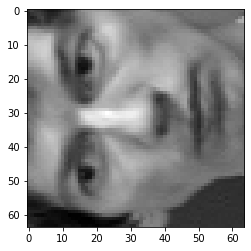

In [53]:
imagepreview(x_test[1])

## part 2

In [69]:
x_train, x_validation = train_test_split(x_train, test_size=0.25,shuffle=False)

In [70]:
k = [0]
RMSE_validation = []
RMSE_train = []

while(k[-1]<=210):
    pca = PCA(n_components=k[-1])
    pca.fit(x_train)
    
    pca_train_x = pca.transform(x_train)
    pca_validation_x = pca.transform(x_validation)
    
    x_train_projected = pca.inverse_transform(pca_train_x)
    x_validation_projected = pca.inverse_transform(pca_validation_x)
    
    rmse_train = mean_squared_error(x_train_projected, x_train, squared=False)
    rmse_validation = mean_squared_error(x_validation_projected, x_validation, squared=False)
    
    RMSE_train.append(rmse_train)
    RMSE_validation.append(rmse_validation)
    k.append(k[-1]+10)

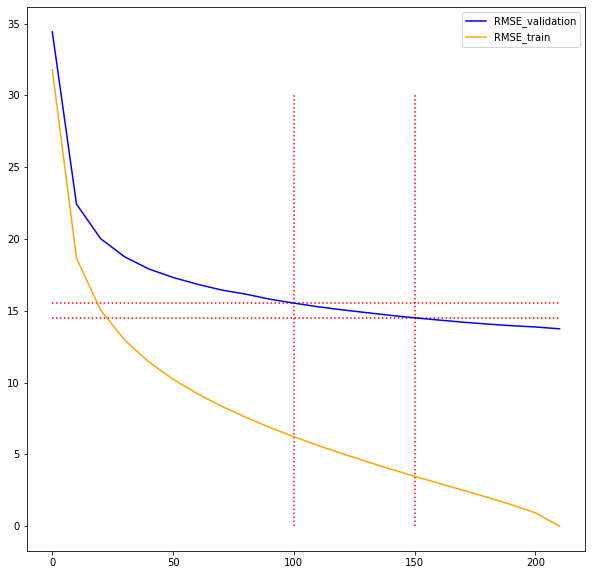

In [71]:
fig = plt.figure(figsize=(10, 10))
plt.plot(k[:-1], RMSE_validation,color='blue',label='RMSE_validation')
plt.plot(k[:-1], RMSE_train,color='orange',label='RMSE_train')
plt.hlines(y=RMSE_validation[10],xmin=0,xmax=210,color='red',linestyles='dotted')
plt.hlines(y=RMSE_validation[15],xmin=0,xmax=210,color='red',linestyles='dotted')
plt.vlines(x=k[10],ymin=0,ymax=30,color='red',linestyles='dotted')
plt.vlines(x=k[15],ymin=0,ymax=30,color='red',linestyles='dotted')
plt.legend()

<BarContainer object of 210 artists>

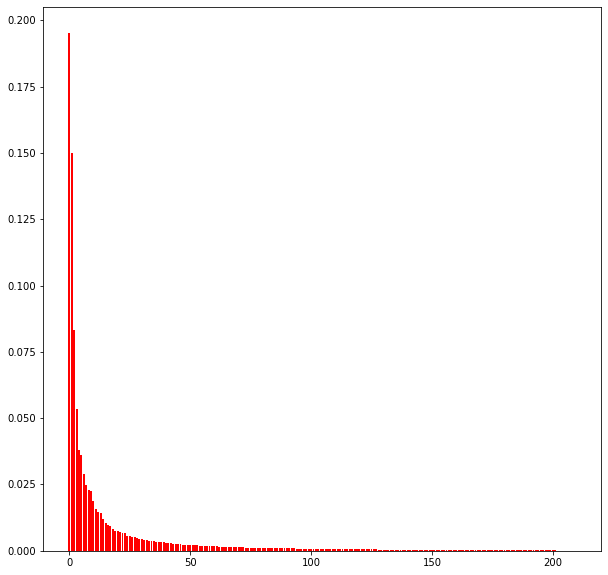

In [72]:
fig = plt.figure(figsize=(10, 10))
plt.bar([i for i in range(0,k[-2])], pca.explained_variance_ratio_,color='red')

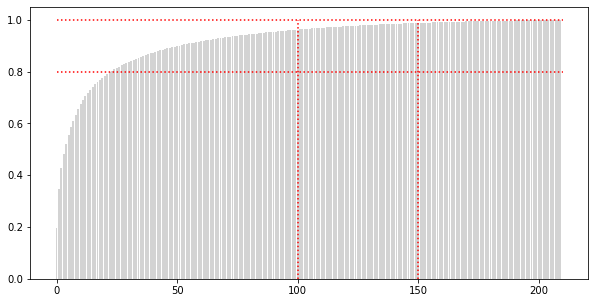

In [73]:
fig = plt.figure(figsize=(10, 5))
plt.bar([i for i in range(0,k[-2])], pca.explained_variance_ratio_.cumsum(),color='lightgrey')
plt.hlines(y=1,xmin=0,xmax=210,color='red',linestyles='dotted')
plt.hlines(y=0.8,xmin=0,xmax=210,color='red',linestyles='dotted')
plt.vlines(x=k[10],ymin=0,ymax=1,color='red',linestyles='dotted')
plt.vlines(x=k[15],ymin=0,ymax=1,color='red',linestyles='dotted')

In [75]:
pca = PCA(n_components=125)
pca.fit(x_train)

pca_train_x = pca.transform(x_train)
pca_validation_x = pca.transform(x_validation)
pca_test_x = pca.transform(x_test)

x_train_projected = pca.inverse_transform(pca_train_x)
x_validation_projected = pca.inverse_transform(pca_validation_x)
x_test_projected = pca.inverse_transform(pca_test_x)

rmse_train = mean_squared_error(x_train_projected, x_train, squared=False)
rmse_validation = mean_squared_error(x_validation_projected, x_validation, squared=False)
rmse_test = mean_squared_error(x_test_projected, x_test, squared=False)

print(f'RMSE on train data = {rmse_train}')
print(f'RMSE on validation data = {rmse_validation}')
print(f'RMSE on test data = {rmse_test}')

RMSE on train data = 4.775306976555008
RMSE on validation data = 14.968495895510301
RMSE on test data = 16.10800194377165
